# PKIDB stats (2022-07-18)

* PKIDB https://www.icoa.fr/pkidb/
* PKIDB download 2002-07-18 https://www.icoa.fr/pkidb/static/download/pkidb_2022-07-18.sdf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit.Chem import PandasTools

In [2]:
plt.rcParams['font.size'] = "14"

## Load datasets

### PKIDB

,BrandName,Applicants,CHEMBL_ID,Canonical_Smiles,Chirality,First_Approval,Phase,SC_Patent,Synonyms,Withdrawn,...,TPSA,LogP,RoF,Melting point,Targets,Kinase families,FDA_approved,ID,SMILES,Molecule
0,,Incyte Corporation,CHEMBL2216863,Cc1csc2n1c(=O)c(c(n2)[C@H](C)Nc3c4c([nH]cn4)nc...,Single Stereoisomer,nan,0.0,None,DEZAPELISIB | INCB040093,,...,100.9,3.7,0,,nan,,,Dezapelisib,Cc1csc2nc([C@H](C)Nc3ncnc4[nH]cnc34)c(-c3cccc(...,
1,,Blueprint Medicines,CHEMBL4514636,C=CC(=O)N[C@H]1CCOC[C@H]1Nc1ncc2cc(-c3c(Cl)c(O...,Single Stereoisomer,nan,0.0,None,BLU-111362 | BLU-554 | BLU111362 | FISOGATINIB...,,...,94.6,4.5,1,,nan,,,Fisogatinib,C=CC(=O)N[C@H]1CCOC[C@H]1Nc1ncc2cc(-c3c(Cl)c(O...,
2,,Pfizer,CHEMBL2103874,CNS(=O)(=O)C[C@H]1CC[C@@H](CC1)N(c2ncnc3c2cc[n...,Single Stereoisomer,nan,0.0,None,JAK-I | JAKI | OCLACITINIB | PF 03394197 | PF-...,,...,91.0,1.5,0,,JAK1; JAK2; JAK3,Tyr,,Oclacitinib,CNS(=O)(=O)C[C@H]1CC[C@H](N(C)c2ncnc3[nH]ccc23...,
3,,Pfizer,CHEMBL13608,Cc1c([nH]c(c1C(=O)NCCN2CCCC2)C)/C=C\3/c4cc(ccc...,Achiral Molecule,nan,0.0,None,PALLADIA | PHA-291639 | TOCERANIB,,...,77.2,3.1,0,,KIT,KIT,,Toceranib,Cc1[nH]c(/C=C2\C(=O)Nc3ccc(F)cc32)c(C)c1C(=O)N...,
4,,Deciphera Pharmaceuticals,CHEMBL3545365,c1cc(ccc1NC(=O)C2(CC2)C(=O)Nc3cc(c(cc3F)Oc4ccn...,Achiral Molecule,nan,1.0,None,ALTIRATINIB | DCC-2701 | DP-5164,,...,109.4,5.0,1,,MET; TEK; KDR; NTRK1,Tyr,,Altiratinib,O=C(Nc1cc(Oc2cc(F)c(NC(=O)C3(C(=O)Nc4ccc(F)cc4...,

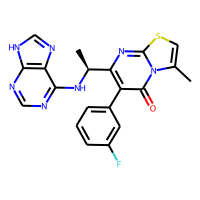
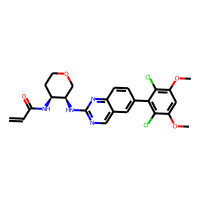
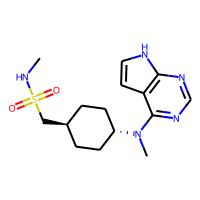
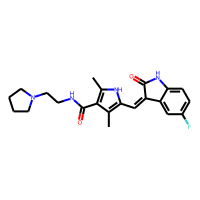
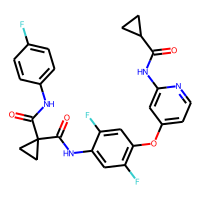

In [3]:
pkidb_df = PandasTools.LoadSDF(
    "data/pkidb_2022-07-18.sdf",
    smilesName="SMILES",
    molColName="Molecule",
    includeFingerprints=True
)
pkidb_df.head()

### BRIMR

In [4]:
brimr_df = pd.read_excel(
    "data/FDA-approved_small_molecule_PKIs.xls",
    skiprows=[0,2],
    skipfooter=14
)
print(brimr_df.shape)
brimr_df.head()

(71, 13)


,Drug,Primary targets,Kinase,Ki (nM)j,pKi,LipEk,Nl,LEk,Targeted diseases,USFDA Drug Label,Monitor EKG,Interactions with strong,Interactions with strong.1
0,Abemaciclib,CDK4/ 6,S/T,0.6,9.22,4.28,37,0.351,Breast cancer,https://www.accessdata.fda.gov/drugsatfda_docs...,NaN,Yes,Yes
1,Abrocitinib,JAK1,NRY,5.1,8.29,7.04,22,0.531,Atopic dermatitis,https://www.accessdata.fda.gov/drugsatfda_docs...,NaN,Yes,Yes
2,Acalabrutinib,BTK,NRY,3.1,8.51,5.2,35,0.343,"Mantle cell lymphoma, chronic lymphocytic leu...",https://www.azpicentral.com/calquence/calquenc...,NaN,Yes,Yes
3,Afatinib,ErbB1/2/4,RY,0.5,9.33,4.94,34,0.387,NSCLC (non-small cell lung cancer),https://www.accessdata.fda.gov/drugsatfda_docs...,NaN,No,No
4,Alectinib,"ALK, RET",RY,1.9,8.72,3.95,36,0.342,ALK-positive NSCLC,https://www.accessdata.fda.gov/drugsatfda_docs...,NaN,No,No


In [5]:
# Fix bugs
brimr_df["Drug"] = brimr_df["Drug"].str.replace("Mobcertinib", "Mobocertinib")

### Drug list for BRIMR and PKIDB

In [6]:
brimr_drugs = brimr_df["Drug"].to_list()
pkidb_drugs = pkidb_df[pkidb_df["FDA_approved"] == "Y"]["ID"].to_list()

## Clinical phases (PKIDB)

https://www.cancer.org/treatment/treatments-and-side-effects/clinical-trials/what-you-need-to-know/phases-of-clinical-trials.html

* Phase 0 clinical trials: Exploring if and how a new drug may work
* Phase 1 clinical trials: Is the treatment safe?
* Phase 2 clinical trials: Does the treatment work?
* Phase 3 clinical trials: Is it better than what’s already available?
* Phase 4 clinical trials: What else do we need to know?
* Intermediate steps: “Phase 1/Phase 2” clinical studies were converted to phase “1.5”

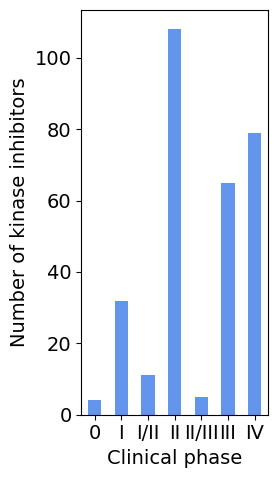

In [7]:
ax = pkidb_df["Phase"].value_counts(sort=False).plot(kind="bar", color="cornflowerblue", figsize=(3, 5))
ax.set_ylabel("Number of kinase inhibitors")
ax.set_xlabel("Clinical phase")
ax.set_xticklabels(["0", "I", "I/II", "II", "II/III", "III", "IV"], rotation=0)

plt.tight_layout()
ax.get_figure().savefig("figures/pki_stats_clinical_phase.pdf")

In [8]:
round(pkidb_df["Phase"].value_counts(sort=False) / len(pkidb_df) * 100, 2)

0.0     1.32
1.0    10.53
1.5     3.62
2.0    35.53
2.5     1.64
3.0    21.38
4.0    25.99
Name: Phase, dtype: float64

Let's be strict and count x.5 phases to the lower phase.

In [9]:
pkidb_df["Phase (floor)"] = pkidb_df["Phase"].apply(lambda x: int(np.floor(float(x))))

In [10]:
round(pkidb_df["Phase (floor)"].value_counts(sort=False) / len(pkidb_df) * 100, 1)

0     1.3
1    14.1
2    37.2
3    21.4
4    26.0
Name: Phase (floor), dtype: float64

## FDA-approved (PKIDB)

In [11]:
pkidb_df[pkidb_df["First_Approval"] != "nan"]["FDA_approved"].value_counts()

Y    73
N     2
Name: FDA_approved, dtype: int64

In [12]:
len(pkidb_df[pkidb_df["FDA_approved"] == "Y"])

73

### First approval but not FDA-approved?

,BrandName,Applicants,CHEMBL_ID,Canonical_Smiles,Chirality,First_Approval,Phase,SC_Patent,Synonyms,Withdrawn,...,LogP,RoF,Melting point,Targets,Kinase families,FDA_approved,ID,SMILES,Molecule,Phase (floor)
261,,Zhejiang Beta Pharma,CHEMBL2087361,C#Cc1cccc(c1)Nc2c3cc4c(cc3ncn2)OCCOCCOCCO4,Achiral Molecule,2011,4.0,None,BPI-2009 | BPI-2009H | ICOTINIB,,...,3.2,0,,EGFR,Tyr,N,Icotinib,C#Cc1cccc(Nc2ncnc3cc4c(cc23)OCCOCCOCCO4)c1,,4
297,,Bukwang Pharmaceutical,nan,N#CC1(CCCC1)c1ccc(cc1)NC(=O)c1cccnc1Nc1cnccc1C,nan,2014,4.0,nan,|CAPECITABINE|ARGET THERAPY|VP-16|ALBUMIN PACL...,|Study NCT03104335 in China was Withdrawn duri...,...,5.1,1,,KDR,Tyr,N,Apatinib,Cc1ccncc1Nc1ncccc1C(=O)Nc1ccc(C2(C#N)CCCC2)cc1,,4

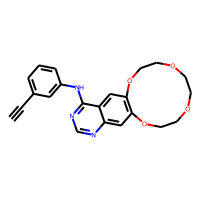
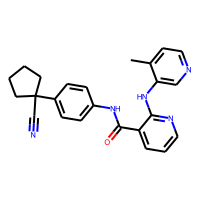

In [13]:
pkidb_df[(pkidb_df["First_Approval"] != "nan") & (pkidb_df["FDA_approved"] == "N")]

### FDA-approved in 2022?

,BrandName,Applicants,CHEMBL_ID,Canonical_Smiles,Chirality,First_Approval,Phase,SC_Patent,Synonyms,Withdrawn,...,LogP,RoF,Melting point,Targets,Kinase families,FDA_approved,ID,SMILES,Molecule,Phase (floor)
232,,Pfizer,CHEMBL3655081,CCCS(=O)(=O)NC1CC(C1)N(C)c2c3cc[nH]c3ncn2,Single Stereoisomer,2022,4.0,None,|ABROCITINIB|PF-04965842|CIBINQO,,...,1.3,0,,nan,,Y,Abrocitinib,CCCS(=O)(=O)NC1CC(N(C)c2ncnc3[nH]ccc23)C1,,4
280,,Cell Therapeutics,CHEMBL2035187,c1cc2cc(c1)-c3ccnc(n3)Nc4ccc(c(c4)COC/C=C/COC2...,Achiral Molecule,2022,4.0,None,ONX-0803 | PACRITINIB | SB-1518 | SB1518,|Study NCT02677948 in United States was Withdr...,...,5.0,0,,JAK2,Tyr,Y,Pacritinib,C1=C\COCc2cc(ccc2OCCN2CCCC2)Nc2nccc(n2)-c2cccc...,,4

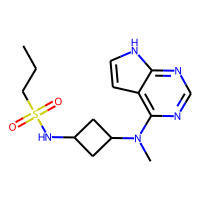
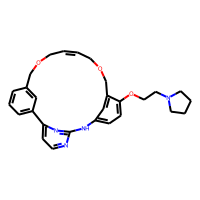

In [14]:
pkidb_df[(pkidb_df["FDA_approved"] == "Y") & (pkidb_df["First_Approval"] == "2022")]

### Time-series of FDA-approvals

In [15]:
stats = (
    pkidb_df[pkidb_df["FDA_approved"] == "Y"]["First_Approval"]
    .sort_values()
    .value_counts(sort=False)
)
stats.sum()

73

In [16]:
def format_approval_year_stats(stats):
    stats = stats.sort_index()
    missing_years = []

    for i, year in enumerate(stats.index):

        if year == stats.index[-1]:
            break

        current_year = int(stats.index[i])
        next_year = int(stats.index[i+1])
        year_gap = next_year - current_year

        if year_gap > 1:
            ii = 0
            for ii in range(1, year_gap):
                missing_years.append(current_year + ii)

    for missing_year in missing_years:
        stats[str(missing_year)] = 0
    stats = stats.sort_index()
    return stats

In [17]:
stats = format_approval_year_stats(stats)

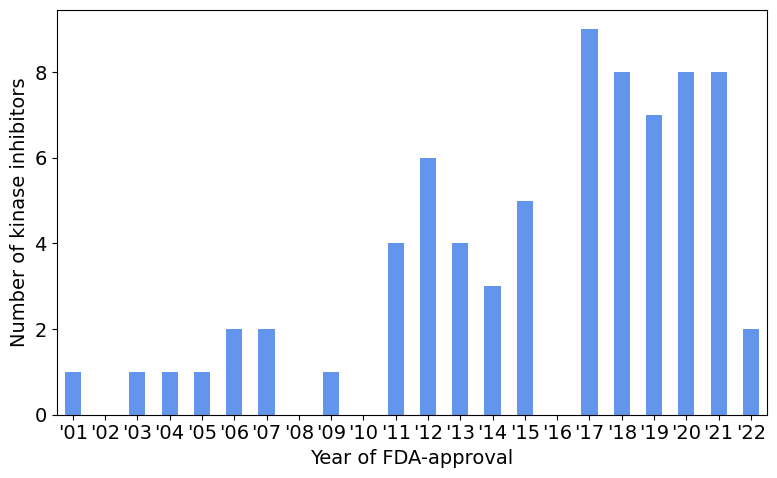

In [18]:
ax = stats.plot(kind="bar", color="cornflowerblue", figsize=(8, 5))
ax.set_ylabel("Number of kinase inhibitors")
ax.set_xlabel("Year of FDA-approval")
ax.set_xticklabels([f"'{i.get_text()[2:]}" for i in ax.get_xticklabels()], rotation=0)

plt.tight_layout()
ax.get_figure().savefig("figures/pki_stats_approval_year.pdf")

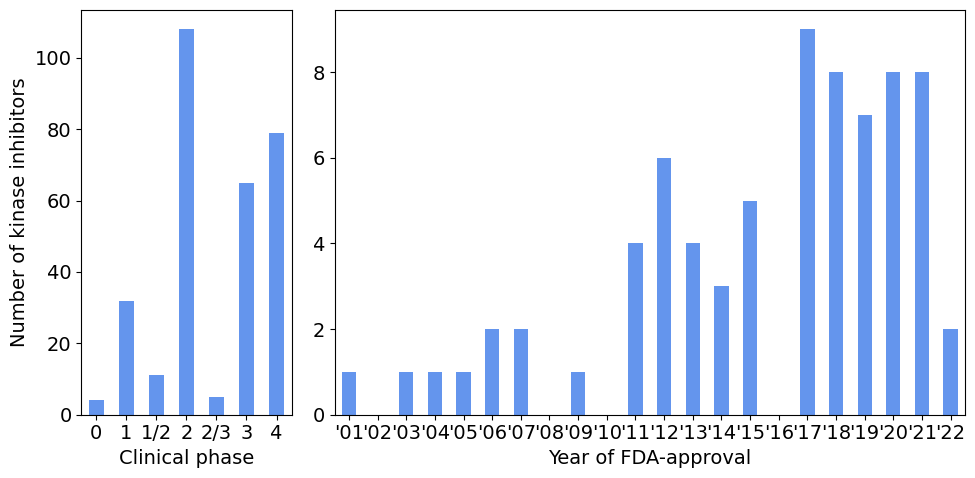

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), gridspec_kw={'width_ratios': [1, 3]})

pkidb_df["Phase"].value_counts(sort=False).plot(kind="bar", color="cornflowerblue", ax=ax1)
ax1.set_ylabel("Number of kinase inhibitors")
ax1.set_xlabel("Clinical phase")
ax1.set_xticklabels(["0", "1", "1/2", "2", "2/3", "3", "4"], rotation=0)

stats.plot(kind="bar", color="cornflowerblue", ax=ax2)
#ax2.set_ylabel("Number of kinase inhibitors")
ax2.set_xlabel("Year of FDA-approval")
ax2.set_xticklabels([f"'{i.get_text()[2:]}" for i in ax2.get_xticklabels()], rotation=0)

plt.tight_layout()
plt.savefig("figures/pki_stats.pdf")

In [20]:
stats.cumsum()

2001     1
2002     1
2003     2
2004     3
2005     4
2006     6
2007     8
2008     8
2009     9
2010     9
2011    13
2012    19
2013    23
2014    26
2015    31
2016    31
2017    40
2018    48
2019    55
2020    63
2021    71
2022    73
Name: First_Approval, dtype: int64

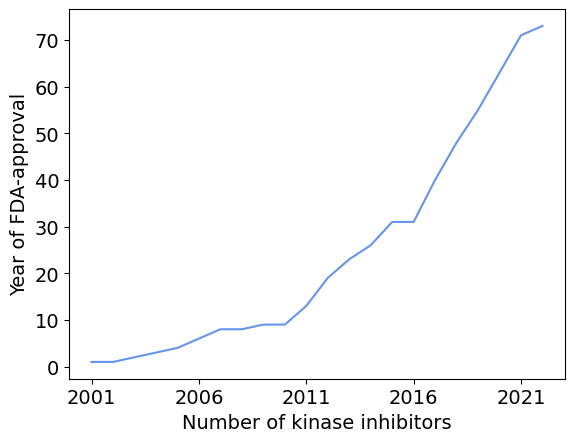

In [21]:
ax = stats.cumsum().plot(color="cornflowerblue")
ax.set_xlabel("Number of kinase inhibitors", {'fontsize': 14})
ax.set_ylabel("Year of FDA-approval", {'fontsize': 14})
ax;

## Compare to BRIMR dataset

http://www.brimr.org/PKI/PKIs.htm

### BRIMR drugs missing in PKIDB

In [22]:
# Missing in PKIDB
set(brimr_drugs) - set(pkidb_drugs)

{'Everolimus', 'Sirolimus', 'Temsirolimus'}

* BRIMR note: Everolimus, sirolimus, and temsirolimus bind to FKBP12 and indirectly inhibit mTOR.
* PKIDB note: Between 2001 and 2017, the Food and Drug Administration (FDA) has approved 37 of these, not counting macrocyclic lactones sirolimus, temsirolimus and everolimus.

### PKIDB drugs missing in BRIMR

In [23]:
# Missing in BRIMR
set(pkidb_drugs) - set(brimr_drugs)

{'Alpelisib', 'Copanlisib', 'Duvelisib', 'Idelalisib', 'Umbralisib'}

* All atypical kinases and hence not listed in BRIMR?